# О возникновении силы тяги в системе вращающихся зарядов

In [1]:
%%cython
cdef extern from "lw_rotate.c":
    # расчет итерациями запаздывающего момента
    double tlag(double x, double y, double z, double t, 
                double (*Coordinate)(double t_zap,
                                     double xc, double yc, double zc,
                                     double R, double omega, double alpha),
                double (*Coordinate)(double t_zap,
                                     double xc, double yc, double zc,
                                     double R, double omega, double alpha),
                double (*Coordinate)(double t_zap,
                                     double xc, double yc, double zc,
                                     double R, double omega, double alpha),
                double (*Velocity)(double t_zap,
                                   double xc, double yc, double zc,
                                   double R, double omega, double alpha),
                double (*Velocity)(double t_zap,
                                   double xc, double yc, double zc,
                                   double R, double omega, double alpha),
                double (*Velocity)(double t_zap,
                                   double xc, double yc, double zc,
                                   double R, double omega, double alpha),
                double xc, double yc, double zc,
                double R, double omega, double alpha)
    
    double tlag_test(double x, double y, double z, double t1, double t2, 
                     double (*Coordinate)(double t_zap,
                                          double xc, double yc, double zc,
                                          double R, double omega, double alpha),
                     double (*Coordinate)(double t_zap,
                                          double xc, double yc, double zc,
                                          double R, double omega, double alpha),
                     double (*Coordinate)(double t_zap,
                                          double xc, double yc, double zc,
                                          double R, double omega, double alpha),
               double xc, double yc, double zc,
               double R, double omega, double alpha)

    # отношение радиуса Лиенара Вихерта к радиусу
    double klw(double x, double y, double z, double t,
                double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double xc, double yc, double zc, double R, double omega, double alpha)
    # Радиус Лиенара Вихерта
    double Rlw(double x, double y, double z, double t,
                double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double xc, double yc, double zc, double R, double omega, double alpha)
    
    
    # phi_lw - скалярный потенциал Лиенара Вихерта
    double philw(double x, double y, double z, double t,
                 double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                 double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                 double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                 double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                 double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                 double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                 double q,
                 double xc, double yc, double zc, double R, double omega, double alpha)


    # A_lw - векторный потенциал Лиенара Вихерта
    void Alw(double x, double y, double z, double t,
             double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
             double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
             double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
             double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
             double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
             double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
             double q,
             double * A_x, double * A_y, double * A_z,
             double xc, double yc, double zc, double R, double omega, double alpha
           )
    
    void electr_magnet(double x, double y, double z, double t,
                       double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                       double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                       double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                       double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                       double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                       double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                       double (*Acceleration)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                       double (*Acceleration)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                       double (*Acceleration)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                       double q,
                       double * E_x, double * E_y, double * E_z, double * B_x, double * B_y, double * B_z,
                       double xc, double yc, double zc, double R, double omega, double alpha)

    void cset_c(double _c)
    void cset_timespan_Epsilon(double _eps)
    double cget_c()
    double cget_timespan_Epsilon()

#sgs 
import numpy as np
cdef double c# = np.float128(1)
cdef double timespan_Epsilon = np.float128(1.0e-8)

cdef double R_r = np.float128(1)
cdef double R_l = np.float128(1)
cdef double S = np.float128(0.005)

# centers of circles
cr = ( S/2+R_r, np.float128(0), np.float128(0))
cl = (-S/2-R_l, np.float128(0), np.float128(0))

cdef double xc_l = cl[0]
cdef double xc_r = cr[0]

cdef double yc_l = cl[1]
cdef double yc_r = cr[1]

cdef double zc_l = cl[2]
cdef double zc_r = cr[2]

cdef double sx(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef double result
    cdef double current_angle = omega * t + alpha
    result = xc + R*np.cos(current_angle)
    return result
cdef double sy(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef double result
    cdef double current_angle = omega * t + alpha
    result = yc + R*np.sin(current_angle)
    return result
cdef double sz(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef double result
    result = zc
    return result

cdef double vx(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef double result
    cdef double current_angle = omega * t + alpha
    result = -omega*R*np.sin(current_angle)
    return result
cdef double vy(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef long double result
    cdef double current_angle = omega * t + alpha
    result = omega*R*np.cos(current_angle)
    return result
cdef double vz(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef double result
    result = 0
    return result


cdef double wx(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef double result
    cdef double current_angle = omega * t + alpha
    result = -omega*omega*R*np.cos(current_angle)
    return result
cdef double wy(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef double result
    cdef double current_angle = omega * t + alpha
    result = -omega*omega*R*np.sin(current_angle)
    return result
cdef double wz(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef double result
    result = 0
    return result

def R_lw(x, y, z, t, xc, yc, zc, R, omega, alpha):
    cdef double Xa = x
    cdef double Ya = y
    cdef double Za = z
    cdef double ta = t

    #print(x, y, z, t)
    #print(Xa, Ya, Za, ta)
    #print(sx(ta))

    cdef double Xc = xc
    cdef double Yc = yc
    cdef double Zc = zc
    cdef double Rc = R
    cdef double Omega = omega
    cdef double Alpha = alpha
    
    cdef double r_lw = Rlw(Xa, Ya, Za, ta, sx, sy, sz, vx, vy, vz, Xc, Yc, Zc, Rc, Omega, Alpha)

    return r_lw

def phi_lw(x, y, z, t, q, xc, yc, zc, R, omega, alpha):
    cdef double Xa = x
    cdef double Ya = y
    cdef double Za = z
    cdef double ta = t

    cdef double q_ = q
    #print(x, y, z, t)
    #print(Xa, Ya, Za, ta)
    #print(sx(ta))
    
    cdef double Xc = xc
    cdef double Yc = yc
    cdef double Zc = zc
    cdef double Rc = R
    cdef double Omega = omega
    cdef double Alpha = alpha

    cdef double philw_ = philw(Xa, Ya, Za, ta, sx, sy, sz, vx, vy, vz, q_, Xc, Yc, Zc, Rc, Omega, Alpha)

    return philw_


def A_lw(x, y, z, t, q, xc, yc, zc, R, omega, alpha):
    cdef double Xa = x
    cdef double Ya = y
    cdef double Za = z
    cdef double ta = t
    cdef double q_ = q
    
    cdef double A_x
    cdef double A_y
    cdef double A_z
    
    cdef double Xc = xc
    cdef double Yc = yc
    cdef double Zc = zc
    cdef double Rc = R
    cdef double Omega = omega
    cdef double Alpha = alpha

    Alw(Xa, Ya, Za, ta,
                  sx, sy, sz, vx, vy, vz,
                  q_,
                  &A_x, &A_y, &A_z, Xc, Yc, Zc, Rc, Omega, Alpha)

    return (A_x, A_y, A_z)

def EB_lw(x, y, z, t, q, xc, yc, zc, R, omega, alpha):
    cdef double Xa = x
    cdef double Ya = y
    cdef double Za = z
    cdef double ta = t
    cdef double q_ = q
    
    cdef double E_x
    cdef double E_y
    cdef double E_z
    cdef double B_x
    cdef double B_y
    cdef double B_z
    
    cdef double Xc = xc
    cdef double Yc = yc
    cdef double Zc = zc
    cdef double Rc = R
    cdef double Omega = omega
    cdef double Alpha = alpha
    
    electr_magnet(Xa, Ya, Za, ta,
                  sx, sy, sz, vx, vy, vz, wx, wy, wz,
                  q_,
                  &E_x, &E_y, &E_z, &B_x, &B_y, &B_z, Xc, Yc, Zc, Rc, Omega, Alpha)

    return (E_x, E_y, E_z, B_x, B_y, B_z)

def t_lag(x, y, z, t, xc, yc, zc, R, omega, alpha):
    cdef double Xa = x
    cdef double Ya = y
    cdef double Za = z
    cdef double ta = t
    cdef double q = 1
    
    cdef double Xc = xc
    cdef double Yc = yc
    cdef double Zc = zc
    cdef double Rc = R
    cdef double Omega = omega
    cdef double Alpha = alpha
    
    
    # расчет итерациями запаздывающего момента
    cdef double lag = tlag(Xa, Ya, Za, ta,
                           sx, sy, sz, vx, vy, vz,
                           Xc, Yc, Zc, Rc, Omega, Alpha)
    return lag


def t_lag_test(x, y, z, t1, t2, xc, yc, zc, R, omega, alpha):
    cdef double Xa = x
    cdef double Ya = y
    cdef double Za = z
    cdef double ta = t1
    cdef double tq = t2
    cdef double q = 1
    
    cdef double Xc = xc
    cdef double Yc = yc
    cdef double Zc = zc
    cdef double Rc = R
    cdef double Omega = omega
    cdef double Alpha = alpha
    
    
    # расчет итерациями запаздывающего момента
    cdef double tst = tlag_test(Xa, Ya, Za, ta, tq,
                                sx, sy, sz,
                                Xc, Yc, Zc, Rc, Omega, Alpha)
    return tst



def calc_sum_Fy_t(N, S, R_l, R_r, t_i,
                  omega,
                  alpha0_l = np.float128(0),
                  alpha0_r = np.float128(0),
                  to_animate = False,
                  to_log = False):
    
    cdef int n = N
    cdef double sign_a
    cdef double sign_q
    
    cdef double Alpha_l
    cdef double Alpha_r
    
    cdef double current_angle_l
    cdef double current_angle_r
    
    cdef double Omega_l = + omega
    cdef double Omega_r = - omega
    
    cdef double Xa, Ya, Za
    cdef double Xq, Yq, Zq

    # current positions of rotated masses
    sign_r = []
    sign_l = []
    alpha_r = []
    alpha_l = []
    
    # n - number of charges per circle
    for i in range(n):
        sign_r += [lambda i=i : -((i%2)*2-1)]
        sign_l += [lambda i=i :   (i%2)*2-1]

        alpha_r += [lambda i=i : i * np.float128(2*np.pi)/n + alpha0_r]
        alpha_l += [lambda i=i : i * np.float128(2*np.pi)/n + alpha0_l]

    cdef double Fx_l = 0.0
    cdef double Fy_l = 0.0
    cdef double Fx_r = 0.0
    cdef double Fy_r = 0.0
    cdef double F_alpha_l = 0.0
    cdef double F_alpha_r = 0.0
    
    #F_alpha_l = []
    #F_alpha_r = []
    frames = []

    for i_a in range(n):
        for i_q in range(n):
            if to_animate:
                from sage.plot.all import Graphics
                p = Graphics()
            i_l = i_a 
            i_r = i_q
            
            sign_a = sign_l[i_a]()
            sign_q = sign_r[i_q]()
            if to_animate:
                if sign_a > 0:
                    color_a = "red"
                else:
                    color_a = "blue"
                if sign_q > 0:
                    color_q = "red"
                else:
                    color_q = "blue"
            
            Alpha_l = np.pi - alpha_l[i_a]()
            Alpha_r = alpha_r[i_q]()
            
            Xa = sx(t_i, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
            Xq = sx(t_i, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
            
            Ya = sy(t_i, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
            Yq = sy(t_i, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
            
            Za = sz(t_i, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
            Zq = sz(t_i, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
            
            if to_animate:
                from sage.plot.circle import circle
                from sage.plot.line import line
                p += circle((cr[0],cr[1]), R_r)
                p += circle((cl[0],cl[1]), R_l)
                p += line ([(cr[0],cr[1]), (Xq, Yq)], color = color_q, linestyle="solid")
                p += line ([(cl[0],cl[1]), (Xa, Ya)], color = color_a, linestyle="solid")
                
                # время запаздывания поля правого заряда в области левого заряда
                t2_a = t_lag(Xa, Ya, Za, t_i, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
                t2_a_test = t_lag_test(Xa, Ya, Za, t_i, t2_a, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
                # запаздывающая координата правого заряда в момент прихода его поля в область левого заряда
                X2_q = sx(t2_a, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
                Y2_q = sy(t2_a, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
                
                # время запаздывания поля левого заряда в области правого заряда
                t2_q = t_lag(Xq, Yq, Zq, t_i, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
                t2_q_test = t_lag_test(Xq, Yq, Zq, t_i, t2_q, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
                # запаздывающая координата левого заряда в момент прихода его поля в область правого заряда
                X2_a = sx(t2_q, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
                Y2_a = sy(t2_q, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
                
                if (to_log):
                    print("t_i=%f t2_a=%f t2_q=%f t2_a*omega/2pi=%f t2_q*omega/2pi=%f" % \
                          (t_i, t2_a, t2_q, t2_a*omega/(2*np.pi), t2_q*omega/(2*np.pi)))
                    print("t_i-t2_a=%f" % \
                          (t_i-t2_a))
                    print("t2_a_test=%f t2_q_test=%f" % (t2_a_test, t2_q_test))
            
            # поле создаваемое правым вращающимся зарядом в области левого вращающегося заряда
            (E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(Xa, Ya, Za, t_i, sign_q, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)

            # сила действующая на левый заряд со стороны поля правого заряда
            fx_l = (E_x)*sign_a
            fy_l = (E_y)*sign_a

            Fx_l += fx_l
            Fy_l += fy_l
            
            current_angle_l = Omega_l * t_i + Alpha_l
            
            # Расчёт углового усилия действующего на левый заряд со стороны поля правого заряда
            f_alpha_l  = fy_l * np.cos(current_angle_l) - fx_l * np.sin(current_angle_l)
            F_alpha_l += f_alpha_l
            
            # поле создаваемое левым вращающимся зарядом в области правого вращающегося заряда
            (E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(Xq, Yq, Zq, t_i, sign_a, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)

            # сила действующая на правый заряд со стороны поля левого заряда
            fx_r = (E_x)*sign_q
            fy_r = (E_y)*sign_q
            
            Fx_r += fx_r
            Fy_r += fy_r
            
            current_angle_r = Omega_r * t_i + Alpha_r
            
            # Расчёт углового усилия действующего на правый заряд со стороны поля левого заряда
            f_alpha_r  = fy_r * np.cos(current_angle_r) - fx_r * np.sin(current_angle_r)
            F_alpha_r += f_alpha_r
            
            if to_animate:
                p += line ([(Xq, Yq), (X2_a, Y2_a)], color = "green", linestyle="dashed")
                p += line ([(X2_q, Y2_q), (Xa, Ya)], color = "green", linestyle="dashed")
                p += line ([(cr[0],cr[1]), (X2_q, Y2_q)], color = color_q, linestyle="dashed")
                p += line ([(cl[0],cl[1]), (X2_a, Y2_a)], color = color_a, linestyle="dashed")

            if to_log:
                print("fx_l=%f fy_l=%f fx_r=%f fy_r=%f" % (fx_l, fy_l, fx_r, fy_r))
            if to_animate:
                p.show(aspect_ratio = 1)
                frames += [p]

    # Интегральная величина тяги в направлении оси y
    # угловое усилие

    return Fy_l + Fy_r, F_alpha_l, F_alpha_r

def calc_Maxwells_stress_tensor(X_a, Y_a, Z_a, t_i, N, S, R_l, R_r,
                                cos_nx, cos_ny, cos_nz,
                                omega,
                                alpha0_l = np.float128(0),
                                alpha0_r = np.float128(0)
                               ):
    
    cdef int n = N
    cdef double sign_a
    cdef double sign_q
    
    cdef double Alpha_l
    cdef double Alpha_r
    
    cdef double Omega_l = + omega
    cdef double Omega_r = - omega
    
    cdef double Xa, Ya, Za
    cdef double Xq, Yq, Zq

    # current positions of rotated masses
    sign_r = []
    sign_l = []
    alpha_r = []
    alpha_l = []
    
    # n - number of charges per circle
    for i in range(n):
        sign_r += [lambda i=i : -((i%2)*2-1)]
        sign_l += [lambda i=i :   (i%2)*2-1]

        alpha_r += [lambda i=i : i * np.float128(2*np.pi)/n + alpha0_r]
        alpha_l += [lambda i=i : i * np.float128(2*np.pi)/n + alpha0_l]

    cdef double Ex = 0
    cdef double Ey = 0
    cdef double Ez = 0
    
    cdef double Hx = 0
    cdef double Hy = 0
    cdef double Hz = 0


    for i_a in range(n):
        for i_q in range(n):
            i_l = i_a 
            i_r = i_q
            
            sign_a = sign_l[i_a]()
            sign_q = sign_r[i_q]()
            
            Alpha_l = np.pi - alpha_l[i_a]()
            Alpha_r = alpha_r[i_q]()
            
            (E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(X_a, Y_a, Z_a, t_i, sign_q, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)

            Ex += E_x
            Ey += E_y
            Ez += E_z
            
            Hx += B_x
            Hy += B_y
            Hz += B_z
            

            (E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(X_a, Y_a, Z_a, t_i, sign_a, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)

            Ex += E_x
            Ey += E_y
            Ez += E_z
            
            Hx += B_x
            Hy += B_y
            Hz += B_z
            
    cdef double sigma_xx = 1/(4*np.pi)*( - Ex*Ex - Hx*Hx + Ey*Ey + Ez*Ez + Hy*Hy + Hz*Hz)
    cdef double sigma_yy = 1/(4*np.pi)*( - Ey*Ey - Hy*Hy + Ez*Ez + Ex*Ex + Hz*Hz + Hx*Hx)
    cdef double sigma_zz = 1/(4*np.pi)*( - Ez*Ez - Hz*Hz + Ex*Ex + Ey*Ey + Hx*Hx + Hy*Hy)
    
    cdef double sigma_xy = 1/(4*np.pi)*( - Ex*Ey - Hx*Hy )
    cdef double sigma_xz = 1/(4*np.pi)*( - Ex*Ez - Hx*Hz )
    cdef double sigma_yz = 1/(4*np.pi)*( - Ey*Ez - Hy*Hz )

    cdef double sigma_yx = 1/(4*np.pi)*( - Ey*Ex - Hy*Hx )
    cdef double sigma_zx = 1/(4*np.pi)*( - Ez*Ex - Hz*Hx )
    cdef double sigma_zy = 1/(4*np.pi)*( - Ez*Ey - Hz*Hy )
    
    #T = [[sigma_xx, sigma_xy, sigma_xz],
    #     [sigma_yx, sigma_yy, sigma_yz],
    #     [sigma_zx, sigma_zy, sigma_zz]]
    
    # Тамм параграф 33 формула (33.5)
    # сила натяжения действующая на площадку поверхности интегрирования
    # со стороны поля создаваемого вращающимися зарядами
    cdef double fy = (sigma_yx * cos_nx + sigma_yy * cos_ny + sigma_yz * cos_nz)
    
    cdef double S_x = 1/(4*np.pi)*(Ey * Hz - Ez * Hy)
    cdef double S_y = 1/(4*np.pi)*(Ez * Hx - Ex * Hz)
    cdef double S_z = 1/(4*np.pi)*(Ex * Hy - Ey * Hx)

    # Интегральная величина количества имульса электромагнитного поля, 
    # вытекающего в единицу времени из замкнутого обьёма через площадку ЛЛ2 32.14
    return fy

def get_S():
    return S
def get_R_l():
    return R_l
def get_R_r():
    return R_r
def get_c():
    return cget_c()
def get_timespan_Epsilon():
    return cget_timespan_Epsilon()

def get_xc_l():
    return xc_l
def get_xc_r():
    return xc_r

def get_yc_l():
    return yc_l
def get_yc_r():
    return yc_r

def get_zc_l():
    return zc_l
def get_zc_r():
    return zc_r

def set_c(c):
    cset_c(c)
def set_timespan_Epsilon(eps):
    cset_timespan_Epsilon(eps)
    
def get_omega_d(vc):
    return vc * get_c() / get_R_r()

In [2]:
set_c(1.0)
set_timespan_Epsilon(1.e-15)
v_c = np.float128(0.984)
v_c = np.float128(0.2)

In [3]:
T = np.float128(2*pi)/get_omega_d(v_c) # период вращения
time_steps_number = 360                # разбиваем период на шаги
dt = T / time_steps_number             # длительность шага

t_i=10.471976 t2_a=9.236171 t2_q=9.236171 t2_a*omega/2pi=0.293996 t2_q*omega/2pi=0.293996
t_i-t2_a=1.235805
t2_a_test=-0.230805 t2_q_test=-0.230805
fx_l=0.977139 fy_l=0.020514 fx_r=-0.977139 fy_r=0.020514
d=1.005000, c(t-t2)=1.005000
d-c(t-t2)=4.440892e-16
d=1.190821, c(t-t2)=1.190821
d-c(t-t2)=-6.661338e-16
d=1.226994, c(t-t2)=1.226994
d-c(t-t2)=-6.661338e-16
d=1.234078, c(t-t2)=1.234078
d-c(t-t2)=-4.440892e-16
d=1.235466, c(t-t2)=1.235466
d-c(t-t2)=2.220446e-16
d=1.235738, c(t-t2)=1.235738
d-c(t-t2)=-6.661338e-16
d=1.235792, c(t-t2)=1.235792
d-c(t-t2)=-6.661338e-16
d=1.235802, c(t-t2)=1.235802
d-c(t-t2)=2.220446e-16
d=1.235804, c(t-t2)=1.235804
d-c(t-t2)=-2.220446e-16
d=1.235804, c(t-t2)=1.235804
d-c(t-t2)=2.220446e-16
d=1.235805, c(t-t2)=1.235805
d-c(t-t2)=8.881784e-16
d=1.235805, c(t-t2)=1.235805
d-c(t-t2)=8.881784e-16
d=1.235805, c(t-t2)=1.235805
d-c(t-t2)=-8.881784e-16
d=1.235805, c(t-t2)=1.235805
d-c(t-t2)=6.661338e-16
d=1.235805, c(t-t2)=1.235805
d-c(t-t2)=-8.881784e-16
d=1.235

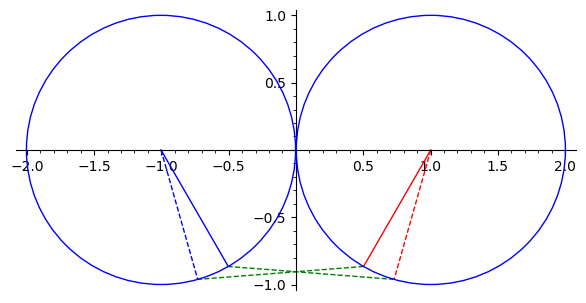

(0.04102727474216793, 0.8564842306534238, -0.856484230653427)

In [4]:
calc_sum_Fy_t(N = 1, S = get_S(), R_l=get_R_l(), R_r=get_R_r(), t_i = T/3,
              omega = get_omega_d(v_c),
              alpha0_l = np.float128(0),
              alpha0_r = np.float128(0),
              to_animate=True, to_log = True)

In [4]:
from scipy import integrate as scipy_integrate

# epsabs
# float or int, optional
# Absolute error tolerance.
# Default is 1.49e-8.
# quad tries to obtain an accuracy of abs(i-result) <= max(epsabs, epsrel*abs(i))
# where i = integral of func from a to b, and result is the numerical approximation. See epsrel below.

# epsrel
# float or int, optional
# Relative error tolerance.
# Default is 1.49e-8.
# If epsabs <= 0, epsrel must be greater than both 5e-29 and 50 * (machine epsilon). See epsabs above.

# limit
# float or int, optional
# An upper bound on the number of subintervals used in the adaptive algorithm.

#Returns:
# result
# float
# The result of the integration.

# abserr
# float
# The maximum of the estimates of the absolute error in the various integration results.

# out_dict
# dict, optional
# A dict containing additional information on the integration.



nquad_default_opts = \
           { 'epsabs' : 1.49e-08,
             'epsrel' : 1.49e-08,
             'limit'  : 50 }

nquad_opts_2 = { 'epsabs' : 1.0e-07,
                 'epsrel' : 1.0e-07,
                 'limit'  : 100 }

nquad_opts_3 = { 'epsabs' : 1.0e-01,
                 'epsrel' : 1.0e-03,
                 'limit'  : 100 }
 
#nquad_opts = { 'epsabs' : 1.49e-07,
#               'epsrel' : 1.49e-07,
#               'limit'  : 200 }

#nquad_opts = { 'epsabs' : 1.49e-08,
#               'epsrel' : 1.49e-08,
#               'limit'  : 100 }

In [6]:
t_fy = []
t_f_alpha_l = []
t_f_alpha_r = []
for i in range(0, time_steps_number):
    t_i = i * dt
    ans = calc_sum_Fy_t(N=1, S=get_S(), R_l=get_R_l(), R_r=get_R_r(), t_i = t_i,
                        omega = get_omega_d(v_c), to_animate=False)
    #print(i, (i/steps_number).n(), t_i, ans)
    t_fy += [(i/time_steps_number, ans[0])]
    t_f_alpha_l += [(i/time_steps_number, ans[1])]
    t_f_alpha_r += [(i/time_steps_number, ans[2])]

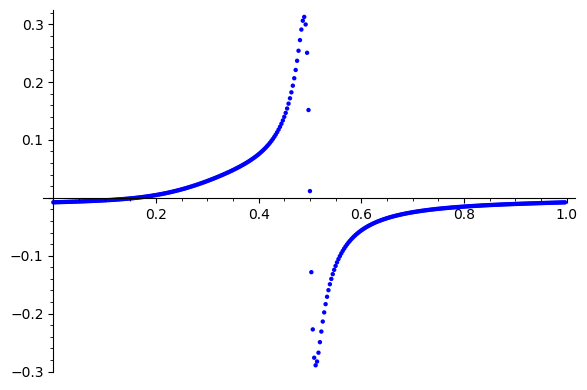

In [7]:
list_plot(t_fy)

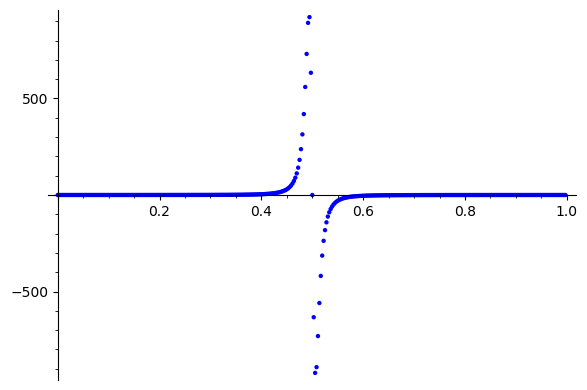

In [8]:
list_plot(t_f_alpha_l)

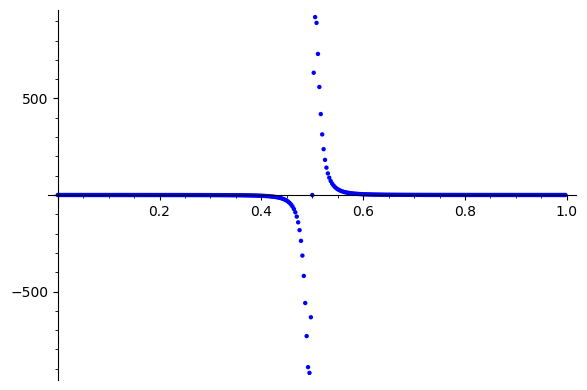

In [9]:
list_plot(t_f_alpha_r)

In [10]:
# интегральная сумма компоненты силы по оси y, приложенной к зарядам, по периоду
sum_fy = 0
for (t_i, fy) in t_fy:
    sum_fy += fy * dt
sum_fy

0.0039190332223595892107

In [11]:
# интегральная сумма компоненты силы по оси y, приложенной к зарядам, по периоду отнесённая к периоду
sum_fy / T

0.00012474670189597753582

In [12]:
# интегральная сумма угловой компоненты силы, приложенной к зарядам левого колеса, по периоду
# суть работа в тещение одного периода, затрачиваемая двигателем на поддержание угловой скорости колеса постоянной
sum_A_alpha_l = 0
dl_alpha = dt * get_omega_d(v_c) * get_R_l()
for (t_i, f) in t_f_alpha_l:
    sum_A_alpha_l += f * dl_alpha
sum_A_alpha_l

-0.000260437453551215185

In [14]:
# интегральная сумма угловой компоненты силы, приложенной к зарядам левого колеса, по периоду отнесённая к периоду
# суть мощность, затрачиваемая двигателем на поддержание угловой скорости колеса постоянной

sum_A_alpha_l / T

-8.289981619788358302e-06

In [15]:
# интеграл компоненты силы по оси y, приложенной к зарядам, по периоду
ans = scipy_integrate.quad(lambda t : \
    calc_sum_Fy_t(N=1, S=get_S(), R_l=get_R_l(), R_r=get_R_r(), t_i = t,
                  omega = get_omega_d(v_c), to_animate=False)[0], 0, T)
ans
# (-8.721028191840928e-10, 3.5107927765742514e-09)

(0.00391903365084495, 1.2426012332411303e-08)

In [16]:
# интеграл угловой компоненты силы, приложенной к зарядам левого колеса, по периоду
ans = scipy_integrate.quad(lambda t : \
    calc_sum_Fy_t(N=1, S=get_S(), R_l=get_R_l(), R_r=get_R_r(), t_i = t,
                  omega = get_omega_d(v_c), to_animate=False)[1], 0, T)
ans
# (-8.721028191840928e-10, 3.5107927765742514e-09)

(-0.001302186716479405, 1.8864871472682593e-09)

In [17]:
# интеграл компоненты силы по оси y, приложенной к зарядам, по периоду отнесённый к периоду
# мощность, затрачиваемая двигателем на поддержание угловой скорости колеса постоянной
ans[0]/T * get_omega_d(v_c) * get_R_l()

-8.2899781102520711e-06

In [18]:
t_fy = []
for i in range(0, time_steps_number):
    t_i = i * dt
    ans = calc_sum_Fy_t(N=2, S=get_S(), R_l=get_R_l(), R_r=get_R_r(), t_i = t_i,
                        omega = get_omega_d(v_c), to_animate=False)
    #print(i, (i/steps_number).n(), t_i, ans)
    t_fy += [(i/time_steps_number, ans[0])]

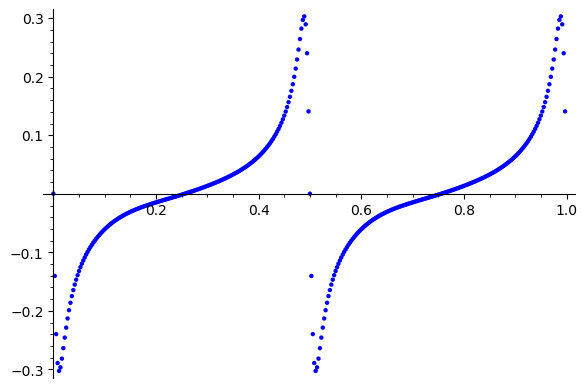

In [19]:
list_plot(t_fy)

In [20]:
# интегральная сумма силы по периоду
sum_fy = 0
for (t_i, fy) in t_fy:
    sum_fy += fy * dt
sum_fy

0.015594680026274175966

In [21]:
# интегральная сумма силы по периоду отнесённая к периоду
sum_fy / T

0.000496394082423596714

In [22]:
ans = scipy_integrate.quad(lambda t : \
    calc_sum_Fy_t(N=2, S=get_S(), R_l=get_R_l(), R_r=get_R_r(), t_i = t,
                  omega = get_omega_d(v_c), to_animate=False)[0], 0, T)
ans

(0.015594678190974133, 4.973515526501826e-09)

In [23]:
# интеграл силы по периоду отнесённый к периоду
ans[0]/T

0.00049639402400418193653

In [24]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

xa_linspace = np.linspace(np.float128(-40), np.float128(+40), 40*2)
ya_linspace = np.linspace(np.float128(-40), np.float128(+40), 40*2)

xa_list = xa_linspace.tolist()
ya_list = ya_linspace.tolist()

xa_grid,ya_grid = np.meshgrid(xa_linspace, ya_linspace)

u_ = xa_grid * np.nan
v_ = ya_grid * np.nan
e_ = xa_grid * np.nan

t_ = ya_grid * np.nan
rlw_ = ya_grid * np.nan
s_ = ya_grid * np.nan
bz_ = ya_grid * np.nan

ax_ = ya_grid * np.nan
ay_ = ya_grid * np.nan
am_ = ya_grid * np.nan
an_ = ya_grid * np.nan

sx_ = ya_grid * np.nan
sy_ = ya_grid * np.nan
sz_ = ya_grid * np.nan

bz_min = +np.finfo(np.float64).max
bz_max = -np.finfo(np.float64).max

sx_min = +np.finfo(np.float64).max
sx_max = -np.finfo(np.float64).max

sy_min = +np.finfo(np.float64).max
sy_max = -np.finfo(np.float64).max

t_cur = 7.5
q = 1

#def make_R():
for ix in np.arange(0, len(xa_linspace), 1):
    for iy in np.arange(0, len(ya_linspace), 1):

        Xa = xa_list[ix]
        Ya = ya_list[iy]
        Za = 0.0
        R = R_lw(Xa, Ya, Za, t_cur, get_xc_r(), get_yc_r(), get_zc_r(), get_R_r(), -get_omega_d(v_c), alpha=0)
        rlw_[iy][ix] = R

        #(E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(Xa, Ya, Za, t_cur, q)
        # The Poynting vector S is defined as to be equal
        # to the cross product (1/μ)E × B
        #S_x = E_y * B_z - E_z * B_y
        #S_y = E_z * B_x - E_x * B_z
        #S_z = E_x * B_y - E_y * B_x
        #sx_[iy][ix] = S_x
        #sy_[iy][ix] = S_y
        #sz_[iy][ix] = S_z
        
        (Al_x, Al_y, Al_z) = A_lw(Xa, Ya, Za, t_cur, q, get_xc_r(), get_yc_r(), get_zc_r(), get_R_r(), -get_omega_d(v_c), alpha=0)
        (Ar_x, Ar_y, Ar_z) = A_lw(Xa, Ya, Za, t_cur, q, get_xc_l(), get_yc_l(), get_zc_l(), get_R_l(), +get_omega_d(v_c), alpha=0)
        ax_[iy][ix] = Al_x + Ar_x
        ay_[iy][ix] = Al_y + Ar_y
        am_[iy][ix] = sqrt((Al_x + Ar_x)^2 + (Al_y + Ar_y)^2)
        an_[iy][ix] = atan2((Al_y + Ar_y),(Al_x + Ar_x))

        #if sx_min > S_x:
        #    sx_min = S_x
        #if sx_max < S_x:
        #    sx_max = S_x        

        #if sy_min > S_y:
        #    sy_min = S_y
        #if sy_max < S_y:
        #    sy_max = S_y


        #u_[iy][ix] = E_x
        #v_[iy][ix] = E_y
        #e_[iy][ix] = sqrt(E_x*E_x + E_y*E_y)

        #t2 = t_lag(Xa, Ya, 0, t_cur)
        #t_[iy][ix] = t2


        phi_r = phi_lw(Xa, Ya, 0, t_cur, q, get_xc_r(), get_yc_r(), get_zc_r(), get_R_r(), -get_omega_d(v_c), alpha=0)
        phi_l = phi_lw(Xa, Ya, 0, t_cur, q, get_xc_l(), get_yc_l(), get_zc_l(), get_R_l(), +get_omega_d(v_c), alpha=0)
        s_[iy][ix] = phi_r+phi_l
        #bz_[iy][ix] = B_z
        #if bz_min > B_z:
        #    bz_min = B_z
        #if bz_max < B_z:
        #    bz_max = B_z

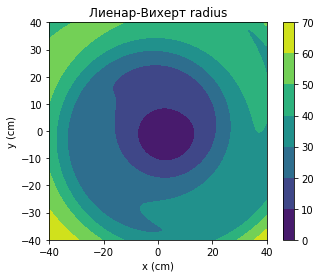

In [25]:
fig,ax=plt.subplots(1,1)
#cp = ax.contourf(xa_grid,ya_grid, rlw_, levels = np.linspace(0, 32, 32/1+1))
cp = ax.contourf(xa_grid,ya_grid, rlw_)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Лиенар-Вихерт radius')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

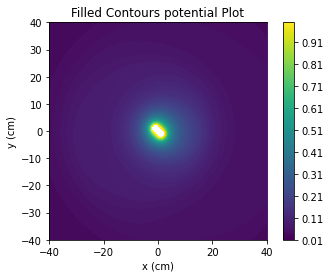

In [26]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, s_, levels = np.linspace(0.01, 1, int((1-0.01)/0.01+1)))
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours potential Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

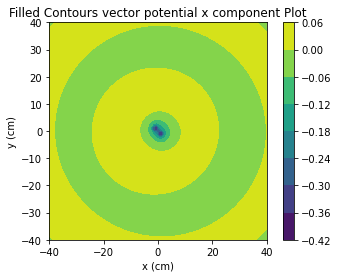

In [27]:
fig,ax=plt.subplots(1,1)
#cp = ax.contourf(xa_grid,ya_grid, ax_, levels = np.linspace(0.04, 0.5, int((1-0.04)/0.04+1)))
cp = ax.contourf(xa_grid,ya_grid, ax_)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours vector potential x component Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

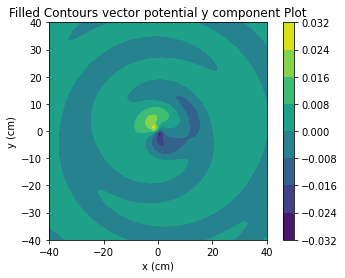

In [28]:
fig,ax=plt.subplots(1,1)
#cp = ax.contourf(xa_grid,ya_grid, ax_, levels = np.linspace(0.04, 0.5, int((1-0.04)/0.04+1)))
cp = ax.contourf(xa_grid,ya_grid, ay_)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours vector potential y component Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

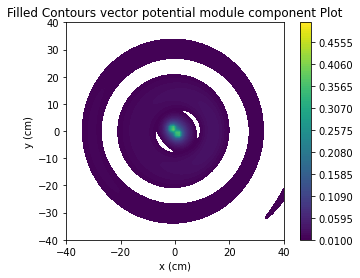

In [33]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, am_, levels = np.linspace(0.01, 0.5, int((1-0.01)/0.01+1)))
cp = ax.contourf(xa_grid,ya_grid, am_)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours vector potential module component Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

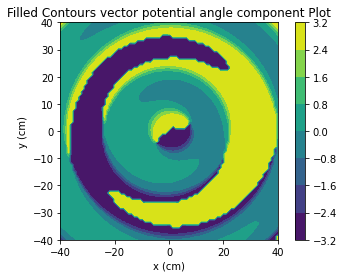

In [30]:
fig,ax=plt.subplots(1,1)
#cp = ax.contourf(xa_grid,ya_grid, an_, levels = np.linspace(0.04, 0.5, int((1-0.04)/0.04+1)))
cp = ax.contourf(xa_grid,ya_grid, an_)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours vector potential angle component Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

Начинаем расчёт силы интегрального давления поля на воображаемый ящик сферической формы окружающий систему зарядов (пусть например "ящик" будет идеально поглощающим излучение).

для расчёта направляющих косинусов нормали к площадке интегрирования при интегрировании по поверхности сферы нам нужен

${\displaystyle {\boldsymbol {\hat {r}}}=\sin \theta \cos \varphi {\boldsymbol {\hat {\imath }}}+\sin \theta \sin \varphi {\boldsymbol {\hat {\jmath }}}+\cos \theta {\boldsymbol {\hat {k}}}}$

<p>ортогональный единичный вектор сферических координат в направлении увеличения ${\displaystyle r}$, а ${\displaystyle {\boldsymbol {\hat {\imath }}},{\boldsymbol {\hat {\jmath }}},{\boldsymbol {\hat {k}}}}$,
— единичные векторы декартовых координат.</p>

In [28]:
# Интегрируем в сферической системе координат,
# у которой однако в соотвествие с принятыми в задаче
# наименованиями осей главная ось игрек вместо зет
spherical_calc_Maxwells_stress_tensor = lambda r, theta, varphi, t : \
    calc_Maxwells_stress_tensor(X_a = r*sin(theta)*cos(varphi),
                                Y_a = r*cos(theta),
                                Z_a = r*sin(theta)*sin(varphi),
                                t_i = t,
                                N = 1, S=get_S(), R_l=get_R_l(), R_r=get_R_r(),
                                cos_nx = - sin(theta)*cos(varphi),
                                cos_ny = - cos(theta),
                                cos_nz = - sin(theta)*sin(varphi),
                                omega = get_omega_d(v_c))

# направление векторов нормали к сферической воображаемой поверхности инвертировано - снаружи вовнутрь

In [29]:
# радиус сферы интегрирования
R = 4 * get_R_l() + 2 * get_S()
R = 40 * get_R_l() + 20 * get_S()
R, R^2

(40.1, 1608.0100000000002)

In [30]:
spherical_calc_Maxwells_stress_tensor_R_t = lambda theta, varphi, t : \
     R^2 * spherical_calc_Maxwells_stress_tensor(r = R, theta = theta, varphi = varphi, t = t)

In [31]:
stress_tensor_upper_half_sphere_R_t = lambda t :  scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_calc_Maxwells_stress_tensor_R_t(theta = theta, varphi = varphi, t = t), \
        [ [0, pi/2],  [0, 2*pi]], opts=nquad_opts_2)
#          theta     varphi

In [32]:
stress_tensor_down_half_sphere_R_t = lambda t :  scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_calc_Maxwells_stress_tensor_R_t(theta = theta, varphi = varphi, t = t), \
        [ [pi/2, pi],  [0, 2*pi]], opts=nquad_opts_2)
#          theta     varphi

In [33]:
stress_tensor_R_t = lambda t :  scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_calc_Maxwells_stress_tensor_R_t(theta = theta, varphi = varphi, t = t), \
        [ [0, pi],  [0, 2*pi]], opts=nquad_opts_2)
#          theta     varphi

In [34]:
T = np.float128(2*pi)/get_omega_d(v_c) # период вращения
time_steps_number = 360                # разбиваем период на шаги
dt = T / time_steps_number             # длительность шага

In [35]:
t_py = []
t_py_up = []
t_py_dw = []
for i in range(0, time_steps_number):
    t_i = i * dt
    ans_up = stress_tensor_down_half_sphere_R_t(t_i)
    print(i, (i/time_steps_number).n(), t_i, ans_up)
    ans_dw = stress_tensor_upper_half_sphere_R_t(t_i)
    print(i, (i/time_steps_number).n(), t_i, ans_dw)
    print(i, (i/time_steps_number).n(), t_i, ans_up[0]+ans_dw[0])
    t_py_up += [(i/time_steps_number, ans_up[0])]
    t_py_dw += [(i/time_steps_number, ans_dw[0])]
    t_py += [(i/time_steps_number, ans_up[0]+ans_dw[0])]

0 0.000000000000000 0.0 (906.1524824499306, 0.00013702508764268373)
0 0.000000000000000 0.0 (-0.6050584795560199, 9.930762147514281e-08)
0 0.000000000000000 0.0 905.5474239703747
1 0.00277777777777778 0.017737085894251316403 (928.7603062979857, 3.476128038293509e-05)
1 0.00277777777777778 0.017737085894251316403 (-0.5923093269835707, 9.131042177461612e-08)
1 0.00277777777777778 0.017737085894251316403 928.1679969710021
2 0.00555555555555556 0.035474171788502632807 (951.7018064157737, 0.00011336401777476638)
2 0.00555555555555556 0.035474171788502632807 (-0.5800903353840284, 9.498812186085604e-08)
2 0.00555555555555556 0.035474171788502632807 951.1217160803897
3 0.00833333333333333 0.053211257682753949208 (974.9867395439634, 9.08869073716484e-05)
3 0.00833333333333333 0.053211257682753949208 (-0.5683723305582997, 9.965230510419802e-08)
3 0.00833333333333333 0.053211257682753949208 974.4183672134051
4 0.0111111111111111 0.07094834357700526561 (998.6250565200181, 0.00014534468184024263)
4

34 0.0944444444444444 0.6030609204045447577 (-0.35719379635522397, 1.8110025187867365e-09)
34 0.0944444444444444 0.6030609204045447577 1937.5542488341962
35 0.0972222222222222 0.6207980062987960741 (1979.9953639321404, 0.0001166394841275102)
35 0.0972222222222222 0.6207980062987960741 (-0.3533988763567641, 1.9679424777539685e-09)
35 0.0972222222222222 0.6207980062987960741 1979.6419650557837
36 0.100000000000000 0.6385350921930473905 (2023.0651041243814, 0.0001753846767229561)
36 0.100000000000000 0.6385350921930473905 (-0.3497208539071924, 2.03109389764338e-09)
36 0.100000000000000 0.6385350921930473905 2022.7153832704741
37 0.102777777777778 0.6562721780872987069 (2067.1606826603233, 0.00023685915294890947)
37 0.102777777777778 0.6562721780872987069 (-0.3461557855979983, 8.557008907223732e-08)
37 0.102777777777778 0.6562721780872987069 2066.8145268747253
38 0.105555555555556 0.67400926398155002335 (2112.3244305345584, 0.00021830873480616075)
38 0.105555555555556 0.6740092639815500233

69 0.191666666666667 1.2238589267033408318 (4475.646065152024, 0.00019181885621053938)
69 0.191666666666667 1.2238589267033408318 (-0.2754845943793252, 1.5179103536105565e-08)
69 0.191666666666667 1.2238589267033408318 4475.370580557645
70 0.194444444444444 1.2415960125975921483 (4609.386347208195, 0.00030400942388620353)
70 0.194444444444444 1.2415960125975921483 (-0.27429681342693635, 1.828770936816611e-08)
70 0.194444444444444 1.2415960125975921483 4609.112050394768
71 0.197222222222222 1.2593330984918434647 (4749.872615609397, 0.0003958739174959383)
71 0.197222222222222 1.2593330984918434647 (-0.27315807902928363, 2.1527682514744447e-08)
71 0.197222222222222 1.2593330984918434647 4749.5994575303675
72 0.200000000000000 1.277070184386094781 (4897.65762358314, 0.00041131029896127654)
72 0.200000000000000 1.277070184386094781 (-0.2720675439492385, 2.4778238499600942e-08)
72 0.200000000000000 1.277070184386094781 4897.38555603919
73 0.202777777777778 1.2948072702803460974 (5053.3561137

104 0.288888888888889 1.844656933002136906 (45934.56672279586, 0.0028260242860018714)
104 0.288888888888889 1.844656933002136906 (-0.25692323029997577, 9.997127199229617e-08)
104 0.288888888888889 1.844656933002136906 45934.30979956556
105 0.291666666666667 1.8623940188963882224 (33533.46525158374, 0.0022902815235372595)
105 0.291666666666667 1.8623940188963882224 (-0.25701166904751394, 4.834960545085791e-08)
105 0.291666666666667 1.8623940188963882224 33533.20823991469
106 0.294444444444444 1.8801311047906395387 (27391.164748880336, 0.002237499497147652)
106 0.294444444444444 1.8801311047906395387 (-0.257141726118729, 4.369583980719755e-08)
106 0.294444444444444 1.8801311047906395387 27390.90760715422
107 0.297222222222222 1.8978681906848908551 (23456.53370957199, 0.0005209592678632191)
107 0.297222222222222 1.8978681906848908551 (-0.2573142029750256, 3.86293278694536e-08)
107 0.297222222222222 1.8978681906848908551 23456.276395369016
108 0.300000000000000 1.9156052765791421715 (20622

138 0.383333333333333 2.4477178534066816637 (-0.28356194136692436, 1.3008401964333463e-08)
138 0.383333333333333 2.4477178534066816637 4252.309469669639
139 0.386111111111111 2.46545493930093298 (4123.820721996553, 0.00018674555798270376)
139 0.386111111111111 2.46545493930093298 (-0.2851219302592784, 1.1119065202640568e-08)
139 0.386111111111111 2.46545493930093298 4123.535600066294
140 0.388888888888889 2.4831920251951842965 (4000.9914622165525, 0.0001407504977065468)
140 0.388888888888889 2.4831920251951842965 (-0.28673602290193195, 9.208871101871324e-09)
140 0.388888888888889 2.4831920251951842965 4000.7047261936505
141 0.391666666666667 2.5009291110894356128 (3883.6858267038106, 0.0002217914699737169)
141 0.391666666666667 2.5009291110894356128 (-0.2884055204196926, 7.272138852470328e-09)
141 0.391666666666667 2.5009291110894356128 3883.397421183391
142 0.394444444444444 2.5186661969836869294 (3771.523001676241, 0.00011571182972196621)
142 0.394444444444444 2.5186661969836869294 (

173 0.480555555555556 3.0685158597054777378 (1717.9580219110212, 0.00014653746273789701)
173 0.480555555555556 3.0685158597054777378 (-0.38242501200931117, 7.161865413328962e-08)
173 0.480555555555556 3.0685158597054777378 1717.575596899012
174 0.483333333333333 3.086252945599729054 (1677.7209021371991, 0.00015649013773909141)
174 0.483333333333333 3.086252945599729054 (-0.3871599185357394, 5.218328488031182e-08)
174 0.483333333333333 3.086252945599729054 1677.3337422186635
175 0.486111111111111 3.1039900314939803706 (1638.422265999419, 0.00016712495243398394)
175 0.486111111111111 3.1039900314939803706 (-0.39205130353280015, 8.825267180798742e-08)
175 0.486111111111111 3.1039900314939803706 1638.0302146958863
176 0.488888888888889 3.121727117388231687 (1600.0273703350638, 0.00015149018202009756)
176 0.488888888888889 3.121727117388231687 (-0.3971053814226384, 2.9221616446029053e-08)
176 0.488888888888889 3.121727117388231687 1599.6302649536412
177 0.491666666666667 3.13946420328248300

207 0.575000000000000 3.6715767801100224954 (-0.6942253117442165, 9.83595338560417e-08)
207 0.575000000000000 3.6715767801100224954 726.7956201366907
208 0.577777777777778 3.689313866004273812 (706.6116374626913, 2.3651105344593693e-05)
208 0.577777777777778 3.689313866004273812 (-0.7117396258329447, 9.97547477194015e-08)
208 0.577777777777778 3.689313866004273812 705.8998978368584
209 0.580555555555556 3.7070509518985251282 (686.0474079388134, 9.805999165735102e-05)
209 0.580555555555556 3.7070509518985251282 (-0.7301260489664436, 7.530551557747153e-08)
209 0.580555555555556 3.7070509518985251282 685.317281889847
210 0.583333333333333 3.7247880377927764448 (665.7862907156856, 0.00011186938920459966)
210 0.583333333333333 3.7247880377927764448 (-0.7494456954063138, 9.754836915081993e-08)
210 0.583333333333333 3.7247880377927764448 665.0368450202793
211 0.586111111111111 3.742525123687027761 (645.8173865878827, 0.0001102609330296822)
211 0.586111111111111 3.742525123687027761 (-0.769765

242 0.672222222222222 4.2923747864088185695 (90.25140403605516, 1.811230600155811e-05)
242 0.672222222222222 4.2923747864088185695 (-3.5946425923312404, 9.126383712491394e-08)
242 0.672222222222222 4.2923747864088185695 86.65676144372392
243 0.675000000000000 4.310111872303069886 (69.95901491511502, 9.656928042988408e-06)
243 0.675000000000000 4.310111872303069886 (-4.095974707856868, 2.627070311454176e-07)
243 0.675000000000000 4.310111872303069886 65.86304020725815
244 0.677777777777778 4.3278489581973212026 (49.09869898660518, 8.335826030148085e-06)
244 0.677777777777778 4.3278489581973212026 (-4.798362100779174, 3.185544692402747e-07)
244 0.677777777777778 4.3278489581973212026 44.300336885826006
245 0.680555555555556 4.345586044091572519 (27.73251864013897, 3.1625895854715575e-06)
245 0.680555555555556 4.345586044091572519 (-5.8770904984644785, 1.519190506345247e-07)
245 0.680555555555556 4.345586044091572519 21.85542814167449
246 0.683333333333333 4.363323129985823835 (6.20458554

276 0.766666666666667 4.8954357068133633273 (-8466.529370029359, 0.0006917738181968502)
276 0.766666666666667 4.8954357068133633273 -8466.180420860883
277 0.769444444444444 4.9131727927076146436 (0.3482695029239018, 1.724441942357905e-08)
277 0.769444444444444 4.9131727927076146436 (-11871.246881146406, 0.00062218387814994)
277 0.769444444444444 4.9131727927076146436 -11870.898611643483
278 0.772222222222222 4.93090987860186596 (0.3477368609601841, 8.585841889953457e-08)
278 0.772222222222222 4.93090987860186596 (-18216.45329494585, 0.0017492030656853785)
278 0.772222222222222 4.93090987860186596 -18216.10555808489
279 0.775000000000000 4.9486469644961172767 (0.3473492109178312, 3.347852002307819e-08)
279 0.775000000000000 4.9486469644961172767 (-33256.86928734421, 0.002033395106891822)
279 0.775000000000000 4.9486469644961172767 -33256.52193813329
280 0.777777777777778 4.966384050390368593 (0.34710527403568836, 3.138540217547094e-08)
280 0.777777777777778 4.966384050390368593 (-98261.

311 0.863888888888889 5.5162337131121594014 (0.4779676583769197, 8.934853489684464e-08)
311 0.863888888888889 5.5162337131121594014 (-91.49054147314615, 1.0182789139172917e-05)
311 0.863888888888889 5.5162337131121594014 -91.01257381476923
312 0.866666666666667 5.5339707990064107178 (0.505614028483415, 8.053385548672308e-08)
312 0.866666666666667 5.5339707990064107178 (-59.80706038330144, 8.196079944451152e-06)
312 0.866666666666667 5.5339707990064107178 -59.301446354818026
313 0.869444444444444 5.551707884900662034 (0.5499489800387267, 8.076747591547406e-08)
313 0.869444444444444 5.551707884900662034 (-30.08019667290323, 2.683687482347378e-06)
313 0.869444444444444 5.551707884900662034 -29.530247692864503
314 0.872222222222222 5.569444970794913351 (0.6464912953585503, 9.915224005531346e-08)
314 0.872222222222222 5.569444970794913351 (-2.102350487735137, 1.6569630219009923e-06)
314 0.872222222222222 5.569444970794913351 -1.455859192376587
315 0.875000000000000 5.587182056689164667 (12.

346 0.961111111111111 6.1370317194109554756 (619.426360423954, 6.542340151709843e-05)
346 0.961111111111111 6.1370317194109554756 (-0.8627071728371799, 7.522335118877078e-08)
346 0.961111111111111 6.1370317194109554756 618.5636532511168
347 0.963888888888889 6.154768805305206792 (638.3491839272291, 9.918099865691143e-05)
347 0.963888888888889 6.154768805305206792 (-0.8376524897322336, 7.57652207087736e-08)
347 0.963888888888889 6.154768805305206792 637.5115314374968
348 0.966666666666667 6.172505891199458108 (657.4724240810231, 9.778706919518626e-05)
348 0.966666666666667 6.172505891199458108 (-0.8139252274428965, 4.9254740826870946e-08)
348 0.966666666666667 6.172505891199458108 656.6584988535801
349 0.969444444444444 6.190242977093709425 (676.8064635998899, 3.9772883641925674e-05)
349 0.969444444444444 6.190242977093709425 (-0.7914294094443227, 9.410174208930322e-08)
349 0.969444444444444 6.190242977093709425 676.0150341904456
350 0.972222222222222 6.2079800629879607413 (696.36138547

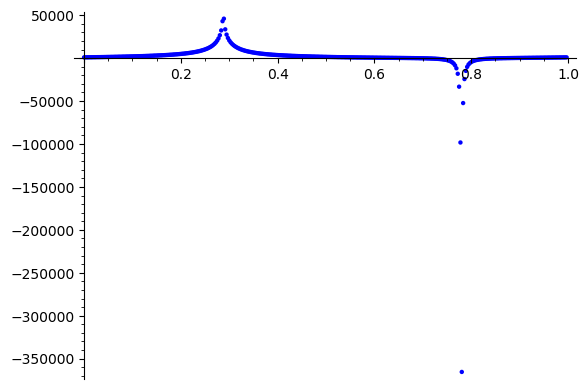

In [45]:
list_plot(t_py)

In [46]:
# интегральная сумма количества импульса, вытекающего в единицу времени из объема воображаемой сферы по периоду
# она же
# интегральная сумма силы приложенной к поверхности воображаемой сферы по периоду
sum_py = 0
for (t_i, py) in t_py:
    sum_py += py * dt
sum_py

7224.226548942872953

In [47]:
# интегральная сумма силы приложенной к поверхности воображаемой сферы по периоду отнесённая к периоду
sum_py / T

1131.3750234354830091

In [48]:
# интегральная сумма по периоду количества импульса,
# вытекающего в единицу времени из объема воображаемой сферы
# через верхнюю полусферу
# она же
# интегральная сумма силы приложенной к поверхности верхней воображаемой полусферы по периоду
sum_py_up = 0
for (t_i, py) in t_py_up:
    sum_py_up += py * dt
sum_py_up

19960.559100252835291

In [49]:
# интегральная сумма силы приложенной к поверхности верхней воображаемой полусферы по периоду отнесённая к периоду
sum_py_up / T

3125.9925013202231867

In [50]:
# интегральная сумма по периоду количества импульса,
# вытекающего в единицу времени из объема воображаемой сферы
# через нижнюю полусферу
# она же
# интегральная сумма силы приложенной к поверхности нижней воображаемой полусферы по периоду
sum_py_dw = 0
for (t_i, py) in t_py_dw:
    sum_py_dw += py * dt
sum_py_dw

-12736.332551309962778

In [51]:
# интегральная сумма силы приложенной к поверхности нижней воображаемой полусферы по периоду отнесённая к периоду
sum_py_dw / T

-1994.6174778847402463

In [43]:
spherical_calc_Maxwells_stress_tensor_R = lambda theta, varphi, t : \
     R^2 * spherical_calc_Maxwells_stress_tensor(r = R, theta = theta, varphi = varphi, t = t)

In [44]:
# "upper\\,half\\,sphere"

Maxwells_stress_tensor_R_upper_half_sphere = scipy_integrate.nquad( \
    spherical_calc_Maxwells_stress_tensor_R, \
        [ [0, np.float128(pi)/2],  [0, np.float128(2*pi)],  [0, np.float128(2*pi)/get_omega_d()]], opts=nquad_opts_3)
#                theta                  varphi                   t

TypeError: _home_drozole__sage_temp_caea0a7c0970_19968_tmp_37jm6gfc_pyx_0.get_omega_d() takes exactly one argument (0 given)

In [ ]:
Maxwells_stress_tensor_R_upper_half_sphere

In [ ]:
# "down\\,half\\,sphere"

Maxwells_stress_tensor_R_down_half_sphere = scipy_integrate.nquad( \
    spherical_calc_Maxwells_stress_tensor_R, \
        [ [np.float128(pi)/2, np.float128(pi)],  [0, np.float128(2*pi)],  [0, np.float128(2*pi)/get_omega_d()]], opts=nquad_opts)
#                theta                  varphi                   t

In [ ]:
Maxwells_stress_tensor_R_down_half_sphere

In [ ]:
Maxwells_stress_tensor_R_upper_half_sphere + Maxwells_stress_tensor_R_down_half_sphere

In [ ]:
Maxwells_stress_tensor_R = scipy_integrate.nquad( \
    spherical_calc_Maxwells_stress_tensor_R, \
        [ [0, np.float128(pi)],  [0, np.float128(2*pi)],  [0, np.float128(2*pi)/get_omega_d()]], opts=nquad_opts)
#                theta                  varphi                   t

In [ ]:
Maxwells_stress_tensor_R
# v_c = np.float128(0.984)
#         result                  abserr
# (-1.553907207973527e-07,  1.0236458948831668)   # 'epsabs' : 1.49e-03, 'epsrel' : 1.49e-03, 'limit'  : 50
# (-1.5539075127251786e-07, 0.009103807089559712) # 'epsabs' : 1.49e-05, 'epsrel' : 1.49e-05, 'limit'  : 200

# 'epsabs' : 1.49e-07, 'epsrel' : 1.49e-07, 'limit'  : 200
# IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
#  the requested tolerance from being achieved.  The error may be 
#  underestimated.

In [ ]:
calc_sum_Fy_t(N=1, S=S, R_l=R_l, R_r=R_r, t_i = 1)